In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading csv file using pandas

In [3]:
df=pd.read_csv("data_2_var.csv", header=None)

In [4]:
#making column names where a is input and b is output
df.columns=["a", "b"]

In [5]:
# printing df 
df.head() # prints 5 cells which are at top

,a,b
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [6]:
# understanding 5 stats of columns in data frame
df[['a','b']].describe()

,a,b
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='a'>

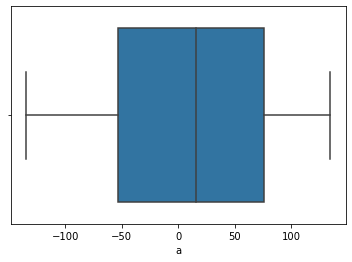

In [7]:
# checking if outliers present using box plot for seperate columns
sns.boxplot(df.a)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='b'>

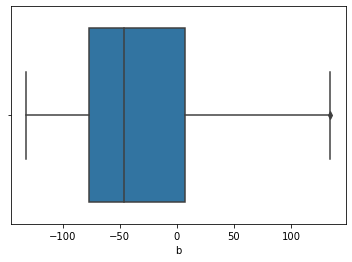

In [8]:
# checking if outliers present using box plot for seperate columns
sns.boxplot(df.b)

In [9]:
# outlier detection
def detect_outlier(data_1):
    outliers =[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(df['b'])

[]

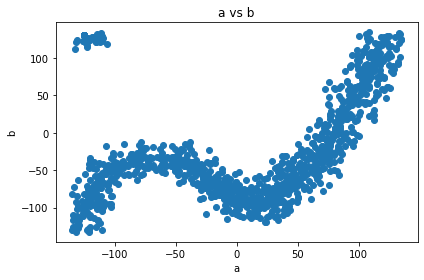

In [10]:
# scatter plot between a vs b
plt.scatter(df.a,df.b)
plt.xlabel("a")
plt.ylabel("b")
plt.title("a vs b")
plt.tight_layout()

In [11]:
df['new'] = np.where((df['a']<-100) & (df['b']>100),1,0)

In [12]:
df= df[df['new']==0]

In [13]:
df = df[['a','b']]

#  modelling

In [14]:
X = df[['a']] # design matrix
y = df['b'] # series

In [15]:
# linear model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

In [16]:
from sklearn.metrics import mean_squared_error as mse

Mean_error = mse(y,y_pred)
print(Mean_error)

2281.344471523116


In [17]:
#  tree model of random forest 
from sklearn.ensemble import RandomForestRegressor 

rf =RandomForestRegressor()
rf.fit(X,y)
y_rpred = rf.predict(X)

Mean_error = mse(y,y_rpred)
print(Mean_error)

90.22714958611651


In [18]:
from sklearn.ensemble import RandomForestRegressor 

rf =RandomForestRegressor(n_estimators=3669)
rf.fit(X,y)
y_rpred = rf.predict(X)

Mean_error = mse(y,y_rpred)
print(Mean_error)

89.91325767893926


In [19]:
import lightgbm as ltb

lg =ltb.LGBMRegressor()

lg.fit(X,y)
y_lpred = lg.predict(X)

Mean_error = mse(y,y_lpred)
print(Mean_error)

377.3353551120522


In [ ]:
# at last 30 minutes they gave me clarity of columns so don't have much time to do.
Thank you